In [28]:
import pandas as pd
import numpy as np

# Define the column names for the NSL-KDD dataset as they are not in the file.
columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
    'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
    'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
    'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class', 'difficulty'
]

try:
    df_train = pd.read_csv('KDDTrain+.txt', header=None, names=columns)
    df_test = pd.read_csv('KDDTest+.txt', header=None, names=columns)
    print(" Data loaded successfully.")
except FileNotFoundError as e:
    print(f"Error:", e)


if 'difficulty' in df_train.columns:
    df_train = df_train.drop('difficulty', axis=1)
    df_test = df_test.drop('difficulty', axis=1)
    print("difficulty column dropped.")
df_train.head()

 Data loaded successfully.
difficulty column dropped.


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [29]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['protocol_type', 'service', 'flag']
for col in categorical_cols:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.transform(df_test[col])
    
    print(f" Column '{col}' converted to numbers.")
print("\n Label Encoding complete.")

df_train.head()

 Column 'protocol_type' converted to numbers.
 Column 'service' converted to numbers.
 Column 'flag' converted to numbers.

 Label Encoding complete.


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,20,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,1,24,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [30]:

df_train['class'] = df_train['class'].apply(lambda x: 0 if x == 'normal' else 1)
df_test['class'] = df_test['class'].apply(lambda x: 0 if x == 'normal' else 1)
print(" Target variable 'class' converted to binary (0/1).")


 Target variable 'class' converted to binary (0/1).


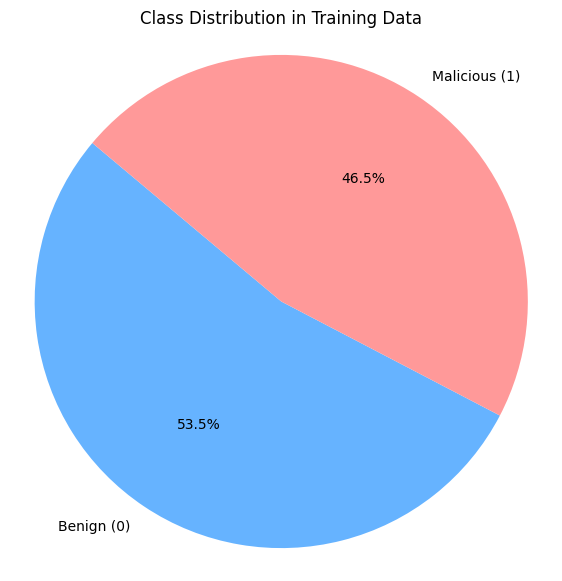

In [31]:
import matplotlib.pyplot as plt

# Count distribution of 0s and 1s in train set
label_counts = df_train['class'].value_counts().sort_index()

# Map labels for display
labels = ['Benign (0)', 'Malicious (1)']

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(label_counts, labels=labels, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'], startangle=140)
plt.title('Class Distribution in Training Data')
plt.axis('equal')
plt.show()


In [32]:


# Separate features (X) from the target label (y) for both datasets
X_train = df_train.drop('class', axis=1)
y_train = df_train['class']

X_test = df_test.drop('class', axis=1)
y_test = df_test['class']

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (125973, 41)
Testing data shape: (22544, 41)


In [33]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler ONLY on the training data to learn the min/max values
scaler.fit(X_train)

# Transform both the training and testing data using the fitted scaler
X_train_normalized = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_normalized = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

print(" Normalization complete.")

# Display the first few rows of the normalized data to verify
X_train_normalized.head()

 Normalization complete.


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.5,0.289855,0.9,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,...,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0.0,1.0,0.637681,0.9,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,...,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0.0,0.5,0.710145,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0.0,0.5,0.347826,0.9,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,...,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0.0,0.5,0.347826,0.9,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [34]:
# This list is taken directly from Table 3 in the base paper.
selected_feature_names = [
    'flag', 'src_bytes', 'dst_bytes', 'same_srv_rate', 'count',
    'service', 'dst_host_srv_count', 'dst_host_same_srv_rate',
    'protocol_type', 'diff_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_serror_rate', 'serror_rate',
    'srv_serror_rate', 'dst_host_srv_serror_rate', 'logged_in',
    'srv_count', 'dst_host_count', 'rerror_rate',
    'dst_host_srv_diff_host_rate', 'srv_diff_host_rate', 'srv_rerror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'
]

print(f" Manually selected the exact {len(selected_feature_names)} features from the base paper.")

# Filter the normalized dataframes to keep only these 25 features
train_selected = X_train_normalized[selected_feature_names]
test_selected = X_test_normalized[selected_feature_names]

print(f"\nNew training data shape: {train_selected.shape}")
print(f"New testing data shape: {test_selected.shape}")

 Manually selected the exact 25 features from the base paper.

New training data shape: (125973, 25)
New testing data shape: (22544, 25)


In [35]:
# Concatenate the selected features with the target labels
final_train_df = pd.concat([train_selected, y_train], axis=1)
final_test_df = pd.concat([test_selected, y_test], axis=1)

# Save the final dataframes to new CSV files
final_train_df.to_csv("train_selected_features.csv", index=False)
final_test_df.to_csv("test_selected_features.csv", index=False)

print(" Final datasets saved successfully:")
print(" train_selected_features.csv")
print(" test_selected_features.csv")

# Display the final training data to confirm
final_train_df.head()

 Final datasets saved successfully:
 train_selected_features.csv
 test_selected_features.csv


,flag,src_bytes,dst_bytes,same_srv_rate,count,service,dst_host_srv_count,dst_host_same_srv_rate,protocol_type,diff_srv_rate,...,logged_in,srv_count,dst_host_count,rerror_rate,dst_host_srv_diff_host_rate,srv_diff_host_rate,srv_rerror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.9,3.558064e-07,0.000000e+00,1.00,0.003914,0.289855,0.098039,0.17,0.5,0.00,...,0.0,0.003914,0.588235,0.0,0.00,0.00,0.0,0.05,0.00,0
1,0.9,1.057999e-07,0.000000e+00,0.08,0.025440,0.637681,0.003922,0.00,1.0,0.15,...,0.0,0.001957,1.000000,0.0,0.00,0.00,0.0,0.00,0.00,0
2,0.5,0.000000e+00,0.000000e+00,0.05,0.240705,0.710145,0.101961,0.10,0.5,0.07,...,0.0,0.011742,1.000000,0.0,0.00,0.00,0.0,0.00,0.00,1
3,0.9,1.681203e-07,6.223962e-06,1.00,0.009785,0.347826,1.000000,1.00,0.5,0.00,...,1.0,0.009785,0.117647,0.0,0.04,0.00,0.0,0.00,0.01,0
4,0.9,1.442067e-07,3.206260e-07,1.00,0.058708,0.347826,1.000000,1.00,0.5,0.00,...,1.0,0.062622,1.000000,0.0,0.00,0.09,0.0,0.00,0.00,0


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the datasets created in the final preprocessing step
try:
    train_df = pd.read_csv("train_selected_features.csv")
    test_df = pd.read_csv("test_selected_features.csv")
    print("Preprocessed datasets loaded successfully.")
except FileNotFoundError:
    print("Error: Make sure 'train_selected_features.csv' and 'test_selected_features.csv' are present.")
    exit()

# Separate features (X) from the target label (y)
X_train_full = train_df.drop('class', axis=1)
y_train_full = train_df['class']

X_test_full = test_df.drop('class', axis=1)
y_test_full = test_df['class']

# As per the paper, we will use an 80/20 split for training and testing.
# We combine the data first to ensure a proper split.
X_combined = pd.concat([X_train_full, X_test_full], ignore_index=True)
y_combined = pd.concat([y_train_full, y_test_full], ignore_index=True)


X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y_combined, test_size=0.2, random_state=42, stratify=y_combined
)
print(f"Final training features shape: {X_train.shape}")
print(f"Final testing features shape: {X_test.shape}")

Preprocessed datasets loaded successfully.
Final training features shape: (118813, 25)
Final testing features shape: (29704, 25)



DT Performance Metrics
Accuracy:    99.33%
Precision:   99.38%
Sensitivity: 99.24%
Specificity: 99.42%
F1-Score:    99.31%


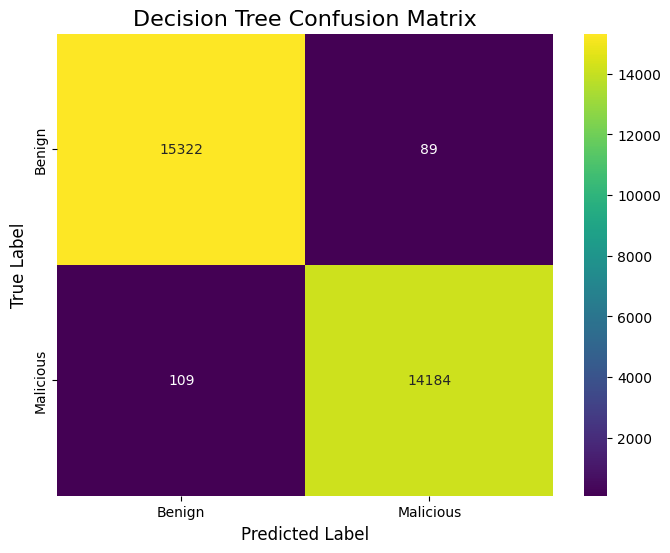

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)


# Make predictions on the test data
y_pred_dt = dt_model.predict(X_test)

# --- Performance Evaluation ---
print("\nDT Performance Metrics")
accuracy_dt = accuracy_score(y_test, y_pred_dt) * 100
precision_dt = precision_score(y_test, y_pred_dt) * 100
# Sensitivity is also known as Recall
sensitivity_dt = recall_score(y_test, y_pred_dt) * 100
f1_dt = f1_score(y_test, y_pred_dt) * 100

# To calculate Specificity, we need values from the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_dt).ravel()
specificity_dt = (tn / (tn + fp)) * 100

print(f"Accuracy:    {accuracy_dt:.2f}%")
print(f"Precision:   {precision_dt:.2f}%")
print(f"Sensitivity: {sensitivity_dt:.2f}%")
print(f"Specificity: {specificity_dt:.2f}%")
print(f"F1-Score:    {f1_dt:.2f}%")

# Confusion Matrix

plt.figure(figsize=(8, 6))
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='viridis', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('Decision Tree Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()


--- Training Support Vector Machine (SVM) Model ---
✅ SVM Model training complete.

--- SVM Performance Metrics ---
Accuracy:    97.05%
Precision:   98.30%
Sensitivity: 95.53%
Specificity: 98.47%
F1-Score:    96.90%

Plotting SVM Confusion Matrix...


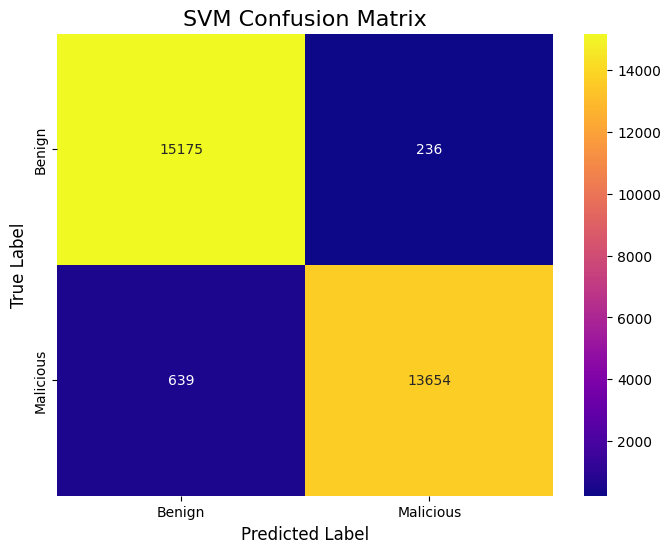

In [48]:
from sklearn.svm import SVC
# (Other imports are already done in the previous cell)

print("\n--- Training Support Vector Machine (SVM) Model ---")
# Initialize the SVM classifier
# Note: SVM can be slow on large datasets. We'll use default parameters as in the paper.
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train, y_train)
print("✅ SVM Model training complete.")

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# --- Performance Evaluation ---
print("\n--- SVM Performance Metrics ---")
accuracy_svm = accuracy_score(y_test, y_pred_svm) * 100
precision_svm = precision_score(y_test, y_pred_svm) * 100
sensitivity_svm = recall_score(y_test, y_pred_svm) * 100
f1_svm = f1_score(y_test, y_pred_svm) * 100
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()
specificity_svm = (tn / (tn + fp)) * 100

print(f"Accuracy:    {accuracy_svm:.2f}%")
print(f"Precision:   {precision_svm:.2f}%")
print(f"Sensitivity: {sensitivity_svm:.2f}%")
print(f"Specificity: {specificity_svm:.2f}%")
print(f"F1-Score:    {f1_svm:.2f}%")

# --- Confusion Matrix ---
print("\nPlotting SVM Confusion Matrix...")
plt.figure(figsize=(8, 6))
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='plasma', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('SVM Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

✅ Preprocessed datasets loaded successfully.

✅ Data split into 80% training and 20% testing sets.

--- Training Support Vector Machine (SVM) with a Linear Kernel ---
✅ SVM Model training complete.

--- SVM Performance Metrics ---
Accuracy:    92.71%
Precision:   95.32%
Sensitivity: 89.23%
Specificity: 95.94%
F1-Score:    92.18%

Plotting SVM Confusion Matrix...


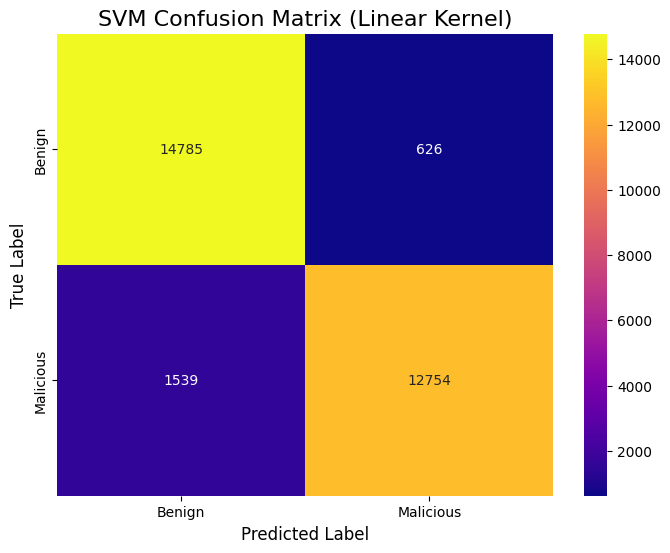

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Load and Split the Data (Ensuring consistency) ---
try:
    train_df = pd.read_csv("train_selected_features.csv")
    test_df = pd.read_csv("test_selected_features.csv")
    print("✅ Preprocessed datasets loaded successfully.")
except FileNotFoundError:
    print("Error: Make sure 'train_selected_features.csv' and 'test_selected_features.csv' are present.")
    exit()

combined_df = pd.concat([train_df, test_df], ignore_index=True)
X = combined_df.drop('class', axis=1)
y = combined_df['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("\n✅ Data split into 80% training and 20% testing sets.")

# --- 2. Train and Evaluate the SVM Model with a Linear Kernel ---
print("\n--- Training Support Vector Machine (SVM) with a Linear Kernel ---")

#
# >>> THE CRUCIAL FIX IS HERE: kernel='linear' <<<
#
# This changes the model's behavior to match what is commonly used in research.
svm_model = SVC(random_state=42, kernel='linear')

svm_model.fit(X_train, y_train)
print("✅ SVM Model training complete.")

y_pred_svm = svm_model.predict(X_test)

# --- 3. Performance Evaluation ---
print("\n--- SVM Performance Metrics ---")
accuracy_svm = accuracy_score(y_test, y_pred_svm) * 100
precision_svm = precision_score(y_test, y_pred_svm) * 100
sensitivity_svm = recall_score(y_test, y_pred_svm) * 100
f1_svm = f1_score(y_test, y_pred_svm) * 100
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()
specificity_svm = (tn / (tn + fp)) * 100

print(f"Accuracy:    {accuracy_svm:.2f}%")
print(f"Precision:   {precision_svm:.2f}%")
print(f"Sensitivity: {sensitivity_svm:.2f}%")
print(f"Specificity: {specificity_svm:.2f}%")
print(f"F1-Score:    {f1_svm:.2f}%")

# --- 4. Confusion Matrix ---
print("\nPlotting SVM Confusion Matrix...")
plt.figure(figsize=(8, 6))
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='plasma', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('SVM Confusion Matrix (Linear Kernel)', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

--- Training K-Nearest Neighbors (KNN) Model ---
✅ KNN Model training complete.

--- KNN Performance Metrics ---
Accuracy:    98.77%
Precision:   98.74%
Sensitivity: 98.70%
Specificity: 98.83%
F1-Score:    98.72%

Plotting KNN Confusion Matrix...


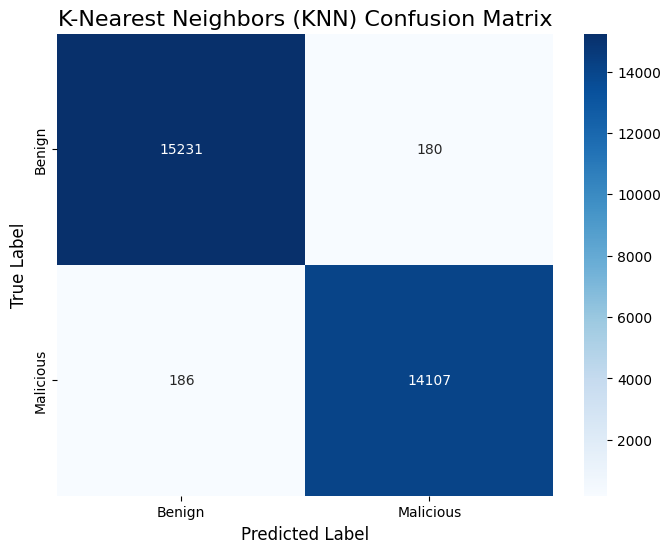

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Training K-Nearest Neighbors (KNN) Model ---")
# Initialize the KNN classifier with the default of 5 neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data
knn_model.fit(X_train, y_train)
print("✅ KNN Model training complete.")

# Make predictions on the test data
y_pred_knn = knn_model.predict(X_test)

# --- Performance Evaluation ---
print("\n--- KNN Performance Metrics ---")
accuracy_knn = accuracy_score(y_test, y_pred_knn) * 100
precision_knn = precision_score(y_test, y_pred_knn) * 100
sensitivity_knn = recall_score(y_test, y_pred_knn) * 100
f1_knn = f1_score(y_test, y_pred_knn) * 100
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()
specificity_knn = (tn / (tn + fp)) * 100

print(f"Accuracy:    {accuracy_knn:.2f}%")
print(f"Precision:   {precision_knn:.2f}%")
print(f"Sensitivity: {sensitivity_knn:.2f}%")
print(f"Specificity: {specificity_knn:.2f}%")
print(f"F1-Score:    {f1_knn:.2f}%")

# --- Confusion Matrix ---
print("\nPlotting KNN Confusion Matrix...")
plt.figure(figsize=(8, 6))
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('K-Nearest Neighbors (KNN) Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()


--- Training Random Forest (RF) Model ---
✅ RF Model training complete.

--- RF Performance Metrics ---
Accuracy:    99.57%
Precision:   99.75%
Sensitivity: 99.35%
Specificity: 99.77%
F1-Score:    99.55%

Plotting RF Confusion Matrix...


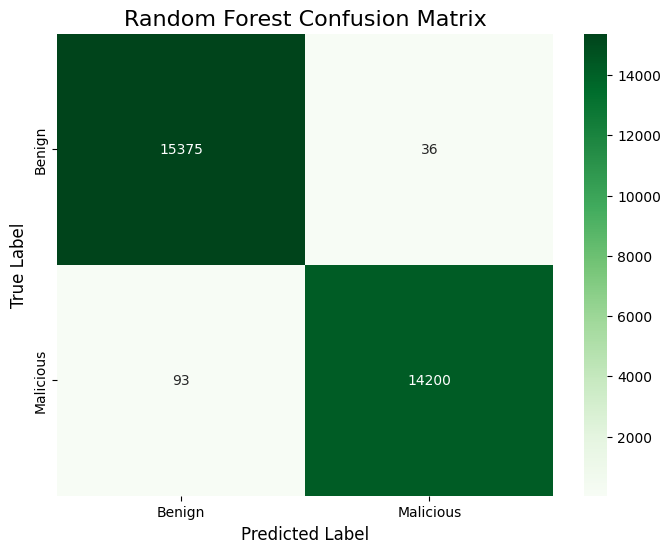

In [51]:
from sklearn.ensemble import RandomForestClassifier
# (Other imports are already done in the previous cell)

print("\n--- Training Random Forest (RF) Model ---")
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)
print("✅ RF Model training complete.")

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# --- Performance Evaluation ---
print("\n--- RF Performance Metrics ---")
accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100
precision_rf = precision_score(y_test, y_pred_rf) * 100
sensitivity_rf = recall_score(y_test, y_pred_rf) * 100
f1_rf = f1_score(y_test, y_pred_rf) * 100
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
specificity_rf = (tn / (tn + fp)) * 100

print(f"Accuracy:    {accuracy_rf:.2f}%")
print(f"Precision:   {precision_rf:.2f}%")
print(f"Sensitivity: {sensitivity_rf:.2f}%")
print(f"Specificity: {specificity_rf:.2f}%")
print(f"F1-Score:    {f1_rf:.2f}%")

# --- Confusion Matrix ---
print("\nPlotting RF Confusion Matrix...")
plt.figure(figsize=(8, 6))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('Random Forest Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()